# Early Model Testing

In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time

### Load dataset

In [2]:
input_file_name = "lotOfFeatures.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
originalSize = original_data.shape[1]
original_data.head()
original_data.shape

(140350, 445)

## Excluding Testing Set

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

In [3]:
#start_time = '2012-02-01 00:00:00'
start_time = '2014-02-01 00:00:00'
splitting_point = int(0.9 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
#data = original_data[:splitting_time]
data = original_data[start_time:]

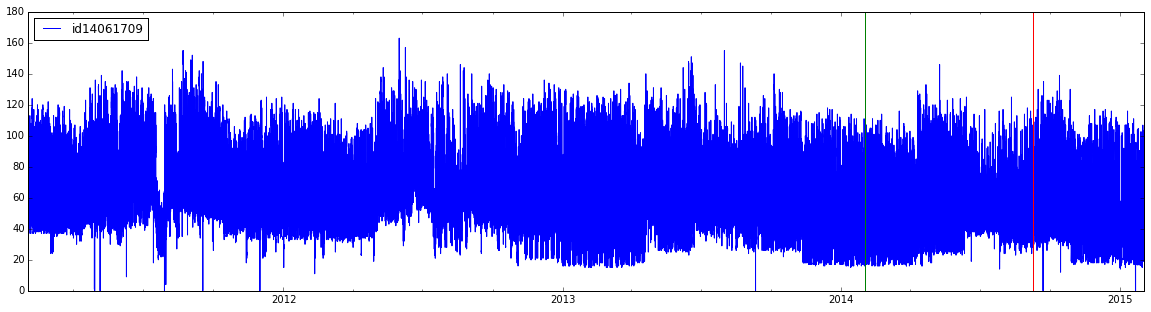

In [4]:
f = original_data[["id14061709"]].plot(figsize=(20,5)) 
original_data.iloc(splitting_point)
f.axvline(start_time, color='g')
f.axvline(splitting_time, color='r')

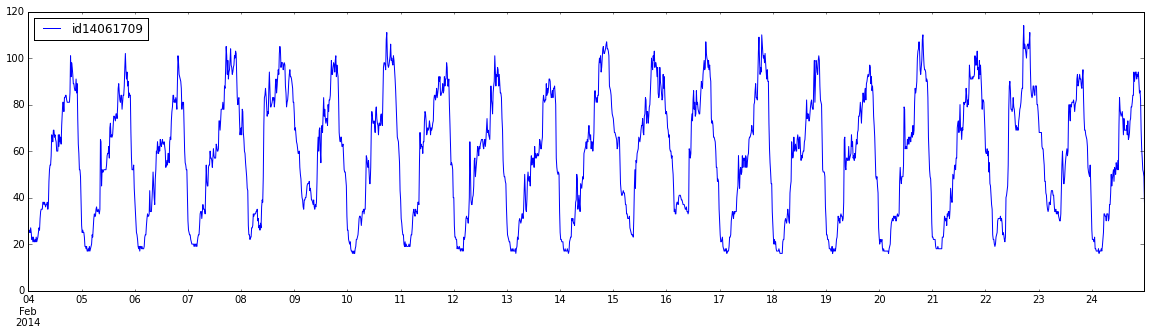

In [5]:
data['2014-02-04':'2014-02-24'][["id14061709"]].plot(figsize=(20,5))  

## Creating Feature Sets

In [6]:
target_col = 'id14061709'

In [7]:
sensor_cols_to_drop = [col for col in list(data) if col.startswith('id') and not col.startswith(target_col)]
#[col for col in list(data) if col not in sensor_cols_to_drop]
data.drop(sensor_cols_to_drop, axis=1, inplace=True)
list(data)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


['id14061709',
 'p',
 't2m_termin',
 'rh_termin',
 'padavine',
 'veter_hitrost',
 'veter_vek_smer',
 'energija_gl',
 'energija_di',
 'HourOfDay',
 'DayOfWeek',
 'Month',
 'Weekday',
 'Weekend',
 'Holiday',
 'DayBeforeHoliday',
 'DayAfterHodliay',
 'BusinessDay',
 'id14061709_roll_mean_1h',
 'id14061709_roll_mean_6h',
 'id14061709_roll_mean_d',
 'id14061709_roll_mean_w',
 'id14061709_roll_mean_m',
 'id14061709_roll_min2_d',
 'id14061709_roll_min2_w',
 'id14061709_roll_max2_d',
 'id14061709_roll_max2_w',
 'id14061709_roll_var_6h',
 'id14061709_roll_var_d',
 'id14061709_roll_var_w',
 'p_roll_mean_1h',
 'p_roll_mean_6h',
 'p_roll_mean_d',
 'p_roll_mean_w',
 'p_roll_mean_m',
 'p_roll_var_1h',
 'p_roll_var_d',
 't2m_termin_roll_mean_1h',
 't2m_termin_roll_mean_6h',
 't2m_termin_roll_mean_d',
 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m',
 't2m_termin_roll_min2_d',
 't2m_termin_roll_min2_w',
 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w',
 't2m_termin_roll_var_1h',
 't2m_termin_r

In [8]:
columnsToShift = list(data)
shiftedColumns = ["shifted_" + col for col in columnsToShift]

In [9]:
measurements_cols = [col for col in list(data) if col.startswith(target_col)]

wetaher_current_cols =  ['p', 't2m_termin', 'rh_termin', 'padavine', 'veter_hitrost', 'veter_vek_smer', 'energija_gl',
 'energija_di', 'p_roll_mean_1h', 'p_roll_mean_6h', 'p_roll_mean_d', 'p_roll_mean_w', 'p_roll_mean_m', 'p_roll_var_1h',
 'p_roll_var_d', 't2m_termin_roll_mean_1h', 't2m_termin_roll_mean_6h', 't2m_termin_roll_mean_d', 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m', 't2m_termin_roll_min2_d', 't2m_termin_roll_min2_w', 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w', 't2m_termin_roll_var_1h', 't2m_termin_roll_var_d', 'rh_termin_roll_mean_1h',
 'rh_termin_roll_mean_6h', 'rh_termin_roll_mean_d', 'rh_termin_roll_mean_w', 'rh_termin_roll_mean_m',
 'rh_termin_roll_min2_d', 'rh_termin_roll_min2_w', 'rh_termin_roll_max2_d', 'rh_termin_roll_max2_w',
 'rh_termin_roll_var_1h', 'rh_termin_roll_var_d', 'energija_gl_roll_mean_1h', 'energija_gl_roll_mean_6h',
 'energija_gl_roll_mean_d', 'energija_gl_roll_mean_w', 'energija_gl_roll_mean_m', 'energija_gl_roll_var_1h',
 'energija_gl_roll_var_d']

weather_forecasted_cols =  ['shifted_p', 'shifted_t2m_termin', 'shifted_rh_termin', 'shifted_padavine', 
                            'shifted_veter_hitrost', 'shifted_veter_vek_smer', 'shifted_energija_gl']

date_time_cols =  ['shifted_HourOfDay', 'shifted_DayOfWeek', 'shifted_Month', 'shifted_Weekday', 'shifted_Weekend', 
                   'shifted_Holiday', 'shifted_DayBeforeHoliday', 'shifted_DayAfterHodliay', 'shifted_BusinessDay', 
                   'shifted_BusinessDay_sum', 'shifted_Holiday_sum']

In [10]:
all_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols + date_time_cols 
m_wc_wf_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols
m_wc_dt_cols = measurements_cols + wetaher_current_cols + date_time_cols 
m_wf_dt_cols = measurements_cols + weather_forecasted_cols + date_time_cols 
m_dt_cols = measurements_cols + date_time_cols 
m_cols = measurements_cols

## Define Machine Learning Models and Data Sets

In [11]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

## Prediction Results

In [12]:
data_sets = [{'name': "all_cols", 'cols': all_cols},
             #{'name': "m_wc_wf_cols", 'cols': m_wc_wf_cols},
             {'name': "m_wc_dt_cols", 'cols': m_wc_dt_cols},
             {'name': "m_wf_dt_cols", 'cols': m_wf_dt_cols},
             {'name': "m_dt_cols", 'cols': m_dt_cols},
             #{'name': "m_cols", 'cols': m_cols},
             ]

error_metrics = [{'name': "R2 Score", 'short': "R2", 'function': metrics.r2_score},
                 #{'name': "Explained Variance Score", 'short': "EV", 'function': metrics.explained_variance_score},
                 {'name': "Mean Absolute Error", 'short': "MAE", 'function': metrics.mean_absolute_error},
                 {'name': "Mean Squared Error", 'short': "MSE", 'function': metrics.mean_squared_error}
                ]

validation_df = pd.DataFrame(columns=pd.MultiIndex.from_arrays([[],[]], names=['dataset', 'error_metric']))

In [13]:
for horizon in range (1,25):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:]
    
    for data_set in data_sets:
        #print "Dataset:\t {}".format(data_set['name'])
        model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)
        
        X_train = training_data[data_set['cols']].values
        y_train = training_data[["shifted_" + target_col]].values.ravel()

        X_test = testing_data[data_set['cols']].values
        y_test = testing_data[["shifted_" + target_col]].values.ravel()

        start = time.time() # Start measuring time
        model.fit(X_train,y_train)
        runtime = time.time() - start # Calculate runtime

        for metric in error_metrics:

            error = metric['function'](y_test, model.predict(X_test))
            validation_df.loc[horizon, (data_set['name'], metric['short'])] = error
            #print "{}: {:.3f}".format(metric['name'], error)


C:\Python27\lib\site-packages\pandas\core\frame.py:2148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Working on prediction horizon: 1h

Working on prediction horizon: 2h

Working on prediction horizon: 3h

Working on prediction horizon: 4h

Working on prediction horizon: 5h

Working on prediction horizon: 6h

Working on prediction horizon: 7h

Working on prediction horizon: 8h

Working on prediction horizon: 9h

Working on prediction horizon: 10h

Working on prediction horizon: 11h

Working on prediction horizon: 12h

Working on prediction horizon: 13h

Working on prediction horizon: 14h

Working on prediction horizon: 15h

Working on prediction horizon: 16h

Working on prediction horizon: 17h

Working on prediction horizon: 18h

Working on prediction horizon: 19h

Working on prediction horizon: 20h

Working on prediction horizon: 21h

Working on prediction horizon: 22h

Working on prediction horizon: 23h

Working on prediction horizon: 24h


In [14]:
validation_df.loc['Mean'] = validation_df.mean()
validation_df

dataset       all_cols                       m_wc_dt_cols            \
error_metric        R2       MAE         MSE           R2       MAE   
1             0.959271  3.519390   24.729722     0.959228  3.530327   
2             0.914184  5.383210   52.141802     0.912744  5.438167   
3             0.913919  5.422851   52.324706     0.914978  5.390316   
4             0.919037  5.228065   49.213122     0.918585  5.260670   
5             0.916649  5.289022   50.665296     0.917395  5.242340   
6             0.881760  6.397369   71.847552     0.884434  6.329904   
7             0.838162  7.534162   98.280584     0.839129  7.515262   
8             0.792811  8.308952  125.753440     0.795413  8.264299   
9             0.801661  8.283161  120.360628     0.802731  8.259798   
10            0.819118  8.015714  109.767844     0.822553  7.909994   
11            0.813129  7.916886  113.410932     0.811835  7.918910   
12            0.824143  7.666808  106.711224     0.823558  7.651801   
13            0.826722  7.725627  105.168494     0.827908  7.708639   
14            0.829702  7.668700  103.368998     0.830873  7.671281   
15            0.837740  7.555570   98.473514     0.835214  7.567796   
16            0.838436  7.634359   98.031553     0.837076  7.658403   
17            0.835159  7.669866  100.004056     0.834216  7.699326   
18            0.828513  7.812699  104.042682     0.826846  7.863506   
19            0.845355  7.423304   93.806011     0.844382  7.447713   
20            0.832126  7.711424  101.817075     0.831163  7.744204   
21            0.829712  7.724564  103.257689     0.825265  7.821401   
22            0.828326  7.806331  104.079157     0.826247  7.861378   
23            0.817330  8.060764  110.748838     0.815409  8.103257   
24            0.812727  7.989623  113.567889     0.817919  7.911860   
Mean          0.848154  7.156184   92.148867     0.848129  7.157106   

dataset                  m_wf_dt_cols                       m_dt_cols  \
error_metric         MSE           R2       MAE         MSE        R2   
1              24.755524     0.959674  3.507206   24.484927  0.959990   
2              53.016875     0.916421  5.347344   50.782693  0.918613   
3              51.681062     0.915596  5.352382   51.305683  0.917497   
4              49.488339     0.920166  5.194934   48.526752  0.919645   
5              50.212218     0.919924  5.167102   48.674662  0.920990   
6              70.222344     0.893188  6.031088   64.903302  0.893363   
7              97.693480     0.849173  7.223097   91.593927  0.847928   
8             124.173685     0.835491  7.408823   99.848371  0.836120   
9             119.711373     0.832123  7.475970  101.875151  0.835072   
10            107.683612     0.844444  7.271553   94.398650  0.845593   
11            114.196004     0.841132  7.270260   96.416101  0.839709   
12            107.065912     0.832181  7.430918  101.833476  0.830510   
13            104.448615     0.836681  7.474099   99.123711  0.839754   
14            102.658183     0.848562  7.265253   91.921497  0.848783   
15            100.006665     0.852778  7.206463   89.347529  0.850632   
16             98.856597     0.850167  7.324223   90.913488  0.847123   
17            100.576327     0.843326  7.457305   95.049888  0.846863   
18            105.054030     0.841107  7.519685   96.401765  0.844557   
19             94.396202     0.852880  7.224934   89.241626  0.852183   
20            102.400908     0.849674  7.259127   91.174198  0.847410   
21            105.954132     0.842505  7.436970   95.500613  0.840090   
22            105.339801     0.832185  7.708045  101.739506  0.830236   
23            111.913791     0.826522  7.808628  105.176158  0.823125   
24            110.419423     0.823691  7.728355  106.918915  0.823479   
Mean           92.163546     0.860816  6.837240   84.464691  0.860803   

dataset                             
error_metric       MAE         MSE  
1             3.487453   24.292842  

NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.

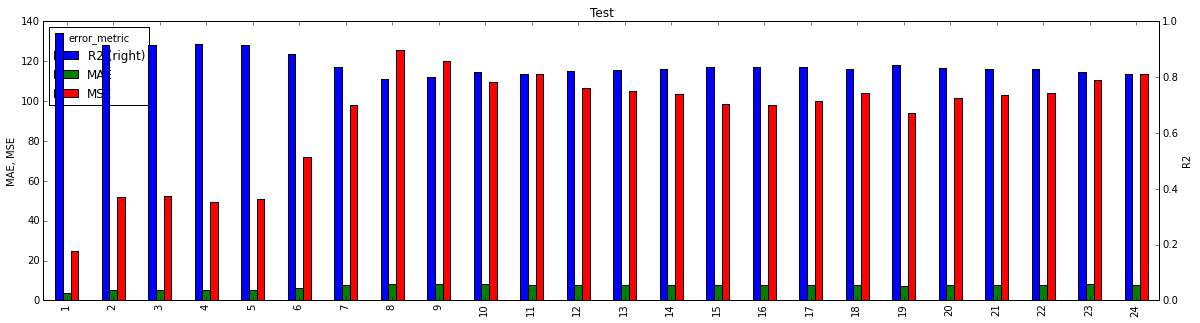

In [15]:
ax = validation_df['all_cols'].iloc[0:24].plot(kind='bar', figsize=(20,5), secondary_y=['R2'], title="Test")
ax.set_ylabel('MAE, MSE')
ax.right_ax.set_ylabel('R2')
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


## Feature Importance

In [16]:
feature_importances = pd.DataFrame(index=all_cols)
feature_importances.index.name = "Feature"
feature_importances.columns.name = "Horizon"
#feature_importances

In [17]:
for horizon in range (1,25):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:]
    
    model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

    X_train = training_data[all_cols].values
    y_train = training_data[["shifted_" + target_col]].values.ravel()

    X_test = testing_data[all_cols].values
    y_test = testing_data[["shifted_" + target_col]].values.ravel()

    start = time.time() # Start measuring time
    model.fit(X_train,y_train)
    runtime = time.time() - start # Calculate runtime
        
    feature_importances.loc[:,horizon] = model.feature_importances_


Working on prediction horizon: 1h

Working on prediction horizon: 2h

Working on prediction horizon: 3h

Working on prediction horizon: 4h

Working on prediction horizon: 5h

Working on prediction horizon: 6h

Working on prediction horizon: 7h

Working on prediction horizon: 8h

Working on prediction horizon: 9h

Working on prediction horizon: 10h

Working on prediction horizon: 11h

Working on prediction horizon: 12h

Working on prediction horizon: 13h

Working on prediction horizon: 14h

Working on prediction horizon: 15h

Working on prediction horizon: 16h

Working on prediction horizon: 17h

Working on prediction horizon: 18h

Working on prediction horizon: 19h

Working on prediction horizon: 20h

Working on prediction horizon: 21h

Working on prediction horizon: 22h

Working on prediction horizon: 23h

Working on prediction horizon: 24h


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
feature_importances

Horizon,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Feature,,,,,,,,,,,,,,,,,,,,,
id14061709,2.244422e-02,0.002085,4.023339e-03,3.018586e-03,3.162285e-03,0.010899,0.008127,0.003972,0.005437,0.006512,...,0.001821,0.003257,4.821479e-03,0.002001,0.002140,0.002827,4.614722e-03,0.004674,0.089895,0.276705
id14061709_roll_mean_1h,9.374788e-01,0.045401,8.133085e-03,3.733224e-02,9.252889e-03,0.012972,0.007418,0.024673,0.006320,0.011933,...,0.004104,0.004026,5.126124e-03,0.003626,0.006048,0.006344,6.148090e-03,0.006013,0.006614,0.037170
id14061709_roll_mean_6h,2.015229e-02,0.819126,9.089906e-01,8.473252e-01,2.882732e-01,0.142759,0.045511,0.028289,0.014243,0.012854,...,0.062647,0.011800,1.103061e-02,0.010223,0.009993,0.012518,1.237771e-02,0.011426,0.012321,0.019092
id14061709_roll_mean_d,6.644333e-04,0.003343,3.602586e-03,3.868846e-03,6.889756e-03,0.015082,0.062750,0.105966,0.080457,0.107674,...,0.106917,0.101596,1.022332e-01,0.102074,0.101756,0.100876,9.361095e-02,0.087540,0.045378,0.016841
id14061709_roll_mean_w,4.001864e-04,0.001346,1.546956e-03,1.197453e-03,1.311766e-03,0.002426,0.002374,0.002627,0.002846,0.002772,...,0.003524,0.005417,5.183436e-03,0.005083,0.005454,0.005554,5.599102e-03,0.006378,0.008983,0.009001
id14061709_roll_mean_m,4.699302e-04,0.001391,1.253869e-03,1.356027e-03,1.815765e-03,0.001456,0.002817,0.003512,0.003920,0.003990,...,0.003547,0.003440,3.043050e-03,0.003015,0.003000,0.003240,3.967922e-03,0.004106,0.003639,0.004318
id14061709_roll_min2_d,4.673954e-04,0.005120,9.765999e-04,1.254483e-03,5.502854e-03,0.041071,0.040866,0.043066,0.044792,0.046153,...,0.045916,0.045838,4.461002e-02,0.044570,0.043681,0.042829,4.063757e-02,0.037912,0.038389,0.011298
id14061709_roll_min2_w,9.924378e-05,0.000327,2.665977e-04,1.815903e-04,2.348574e-04,0.000207,0.000323,0.000429,0.000252,0.000371,...,0.000692,0.000503,4.031116e-04,0.000417,0.000437,0.000552,4.775148e-04,0.000595,0.000457,0.001110
id14061709_roll_max2_d,4.966322e-04,0.001244,1.648149e-03,2.838483e-03,1.329296e-02,0.010157,0.013668,0.006897,0.038769,0.007722,...,0.008379,0.008116,8.965470e-03,0.009846,0.008800,0.007980,1.091491e-02,0.007376,0.017967,0.016805


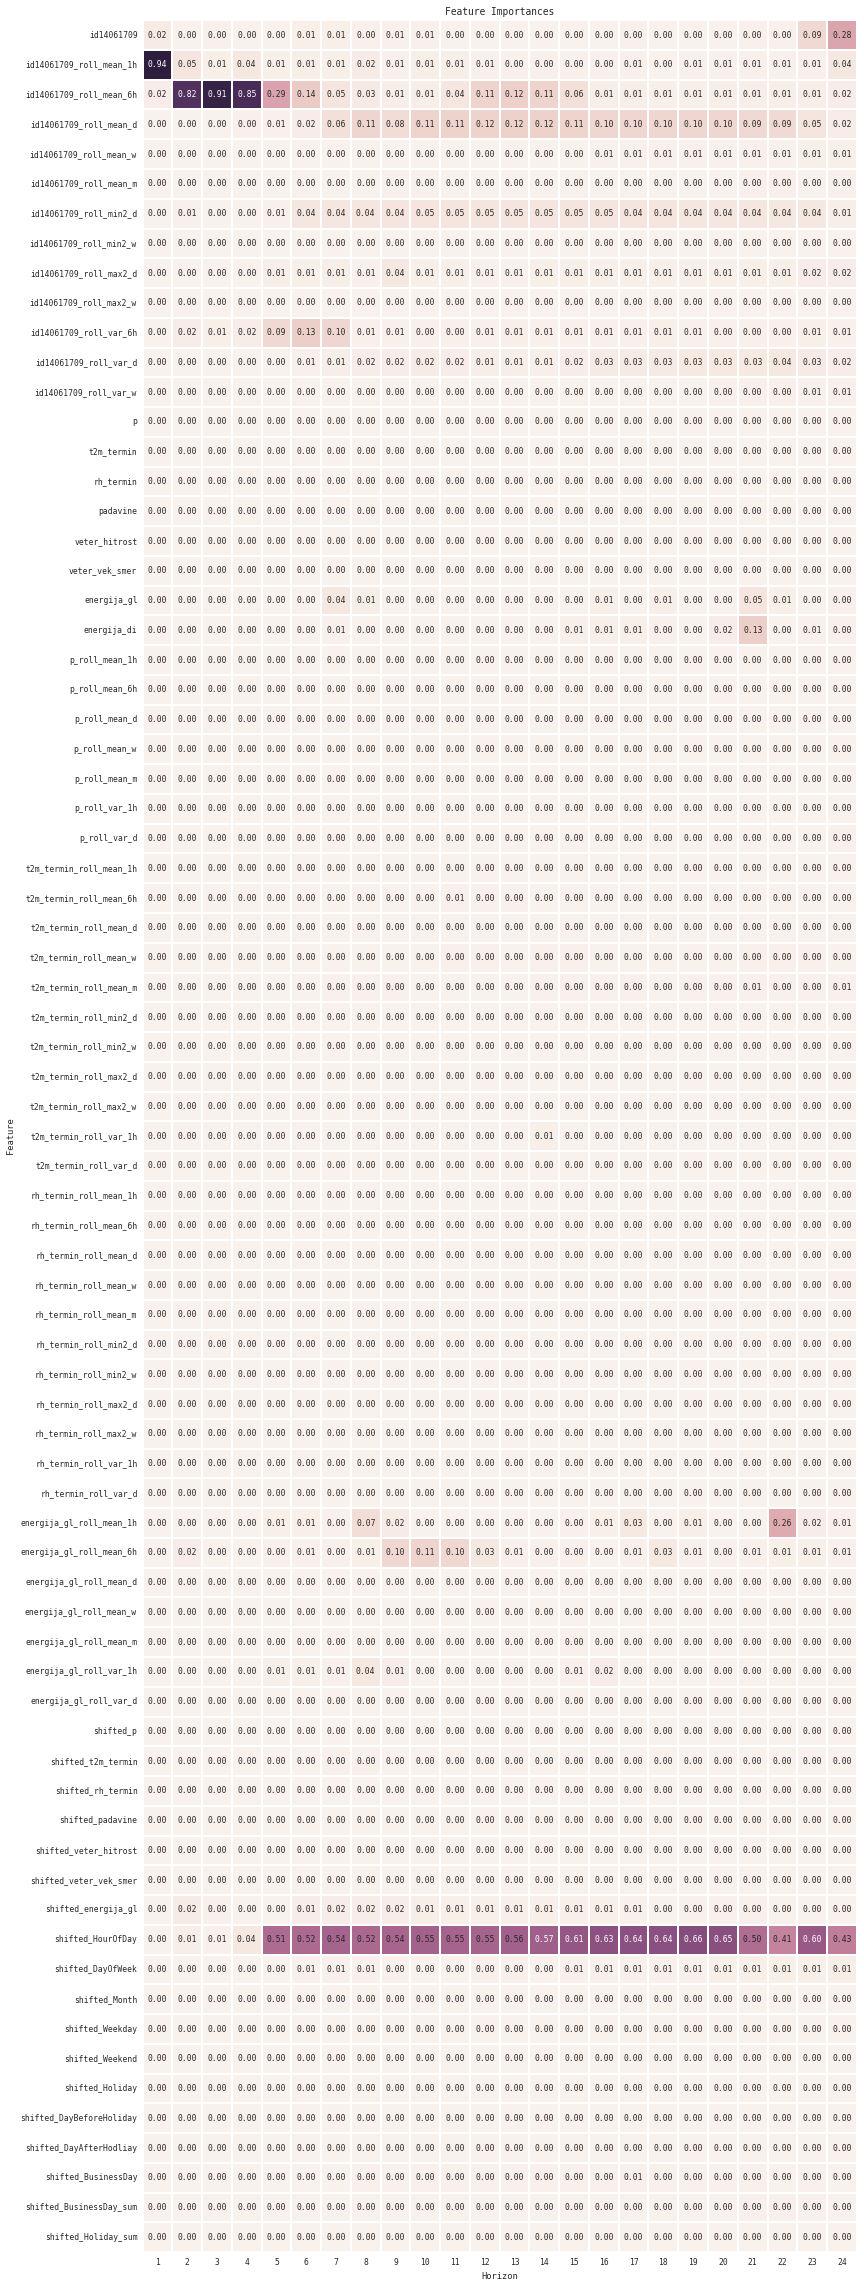

In [19]:
import seaborn as sns
sns.set(context="paper", font="monospace")

f, ax = plt.subplots(figsize=(30, 40))
sns.heatmap(feature_importances, square=True, annot=True, annot_kws={"size": 8}, fmt=".2f", cbar=False)
plt.title("Feature Importances")